## Data load and preprocess

In [1]:
# !usr/env/python in .env
# setup
from load_data import Download_Video
from datetime import datetime
import os
import logging
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from load_feature import load_features

# filter out unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2
%matplotlib inline

# figure parameters
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Using TensorFlow backend.


Download data based on url. The data information is from json files. The json file format is like the following: 
  
"videos": [{"category": 9, "url": "https://www.youtube.com/watch?v=9lZi22qLlEo", "video_id": "video0", "start time": 137.72, "end time": 149.44, "split": "train", "id": 0}  
  
Categories:

In [ ]:
# load data
video_num = 10000 # originally, 10000 urls
frame_count = 10
video_time = 10
d = Download_Video(video_num, frame_count, video_time)
tic = datetime.now()
d.download_organizer()
toc = datetime.now()
print('Download time {0}'.format(toc-tic))

In [44]:
# process data
video_num = 10000
frame_count = 10
video_time = 10
d = Download_Video(video_num, frame_count, video_time)
tic = datetime.now()
d.preprocess_organizer()
toc = datetime.now()
print('Process time {0}'.format(toc-tic))

In [45]:
# data check
curr = os.getcwd() + '/datasets/category.npy'
y = np.load(curr)
print('Total number of videos: {0}'.format(y.shape[0]))
if y.shape[0] < video_num:
    print ('There exists invalid video url!')

Total number of videos: 8633
There exists invalid video url!


Average Video Count: 431.65


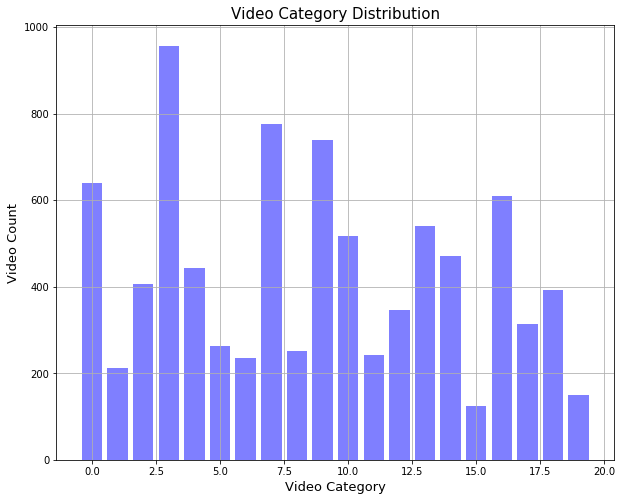

In [43]:
# classes balance check
categories = y[:, 1]
video_dic = Counter(categories)
video_dic = {int(key): value for key, value in video_dic.items()}
cat = list(video_dic.keys())
cat_count = list(video_dic.values())
print('Average Video Count: {0}'.format(sum(cat_count) / float(len(cat_count))))

# plotting
plt.bar(cat, cat_count, align='center',color='blue', alpha=0.5)
plt.grid()
plt.xlabel('Video Category', fontsize = 13)
plt.ylabel('Video Count', fontsize = 13)
plt.title('Video Category Distribution', fontsize = 15)

The distribution offers the intuition of category. The average count of video category is 423. We remove the categories with low count. Here the threshold is 400. 

In [ ]:
# balance data

Now load Xtrain, ytrain, Xtest, and ytest data. Since we obtain more balanced data from above, and save video indices and their corresponding labels to npy files. We could directly read these indices and labels to retrieve and combine video frames and give correspondent output from pretrained model. The cell below is to load concatenate features. Note: be careful to choose number of frames. If the number of frames is too big, it will produce memory error, which means the system could not load the entire datasets. Here we first choose 15 frames. More details could be seen in **load_feature.py**.

In [2]:
# load features training data
skipnum = 0
num_frames = 15
size = (224, 224, 3)

# more balanced data
idx_path = os.getcwd() + '/datasets/x_train_ind_above400.npy'
Xtrain_idx = np.load(idx_path)
labels = np.load(os.getcwd() + '/datasets/y_train_mapped_above400.npy')

# if all videos then 
num_videos = len(Xtrain_idx)

tic = datetime.now()
Xtr, ytr = load_features(num_videos, num_frames, video_idx = Xtrain_idx, \
                               labels = labels, size = size, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

processing videos...
process 64/4270
process 128/4270
process 192/4270
process 256/4270
process 320/4270
process 384/4270
process 448/4270
process 512/4270
process 576/4270
process 640/4270
process 704/4270
process 768/4270
process 832/4270
process 896/4270
process 960/4270
process 1024/4270
process 1088/4270
process 1152/4270
process 1216/4270
process 1280/4270
process 1344/4270
process 1408/4270
process 1472/4270
process 1536/4270
process 1600/4270
process 1664/4270
process 1728/4270
process 1792/4270
process 1856/4270
process 1920/4270
process 1984/4270
process 2048/4270
process 2112/4270
process 2176/4270
process 2240/4270
process 2304/4270
process 2368/4270
process 2432/4270
process 2496/4270
process 2560/4270
process 2624/4270
process 2688/4270
process 2752/4270
process 2816/4270
process 2880/4270
process 2944/4270
process 3008/4270
process 3072/4270
process 3136/4270
process 3200/4270
process 3264/4270
process 3328/4270
process 3392/4270
process 3456/4270
process 3520/4270
proce

In [6]:
print('Xtrain shape: ', Xtr.shape) # should be four dimensions, the first one is num_videos * num_frames
print('ytrain shape: ', ytr.shape)
assert Xtr.shape[0] == num_videos * num_frames

Xtrain shape:  (64050, 7, 7, 512)
ytrain shape:  (4270,)


In [7]:
# save processed data for convenient in future 
np.save(os.getcwd() + '/datasets/Xtrain_all_' + str(num_frames) + 'frames.npy', Xtr)
np.save(os.getcwd() + '/datasets/ytrain_all_' + str(num_frames) + 'frames.npy', ytr)

In [11]:
# load test data
'''
Here may have memory issue after loading training data, 
thus we need to clear data first
'''
import gc 
gc.collect()
del Xtr
del ytr

skipnum = 0
num_frames_test = 15
size = (224, 224, 3)

# more balanced data
idx_path = os.getcwd() + '/datasets/x_test_ind_above400.npy'
Xtest_idx = np.load(idx_path)
ytest = np.load(os.getcwd() + '/datasets/y_test_mapped_above400.npy')

# if all videos then 
num_videos_test = len(Xtest_idx)

tic = datetime.now()
Xte, yte = load_features(num_videos_test, num_frames_test, video_idx = Xtest_idx, \
                               labels = ytest, size = size, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

processing videos...
process 64/1830
process 128/1830
process 192/1830
process 256/1830
process 320/1830
process 384/1830
process 448/1830
process 512/1830
process 576/1830
process 640/1830
process 704/1830
process 768/1830
process 832/1830
process 896/1830
process 960/1830
process 1024/1830
process 1088/1830
process 1152/1830
process 1216/1830
process 1280/1830
process 1344/1830
process 1408/1830
process 1472/1830
process 1536/1830
process 1600/1830
process 1664/1830
process 1728/1830
process 1792/1830
cache processed data...
Feature fusion time:  0:10:32.829278


In [12]:
print('Xtest shape: ', Xte.shape)
print('ytest shape: ', yte.shape)
assert Xte.shape[0] == num_videos_test * num_frames_test

Xtest shape:  (27450, 7, 7, 512)
ytest shape:  (1830,)


In [13]:
# save processed data
np.save(os.getcwd() + '/datasets/Xtest_all_' + str(num_frames) + 'frames.npy', Xte)
np.save(os.getcwd() + '/datasets/ytest_all_' + str(num_frames) + 'frames.npy', yte)

In [14]:
# clear memory
del Xte
del yte
gc.collect()

0

## Video classification model

In this part, we are going to build up our model. For CNN architecture, we select pretrained imagenet CNN model for convenience. Here pretrained VGG16 is applied. The biggest challenge to classify videos is how to fuse different frames and give single prediction for every video. By reading several paper, we are going to do the following:  
* 3D Temporal Max Pooling over frame size and timesteps  
* 3D Convolution + 3D Pooling without pretrained model
* VGG16 + LSTM achitectures

In [52]:
from sklearn.metrics import classification_report
import gc
# some util functions

# precision-recall report function
def classification_report_func(model, Xte, yte):
    ypred = model.predict(Xte)
    ypred = np.argmax(ypred, axis = 1)
    target_names = ['music', 'gaming', 'sports/actions', 'news/events/politics', 'movie/comedy', 'vehicles/autos',\
               'howto', 'animals/pets', 'kids/family', 'food/drink']
    print(classification_report(yte, ypred, target_names = target_names))

def loss_plot(hist, title, filename):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig(os.getcwd() + '/output/' + filename)

def acc_plot(hist, title, filename):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig(os.getcwd() + '/output/' + filename)

### 3D temporal max pooling  
In [[1]](https://arxiv.org/abs/1503.08909), Yue-Hei Ng *et al* describes specifically 3D features max pooling method: Conv Pooling, Late Pooling, Slow Pooling, Local Pooling, and Time-Domain Pooling. After running several experiments, it turns out Conv Pooling performs best. Here we follow this Conv Pooling Method. In terms of how to do 3D Max Pooling, Feichtenhofer *et al* give more details and practices [[2]](http://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Feichtenhofer_Convolutional_Two-Stream_Network_CVPR_2016_paper.pdf). 

Our model architecture:  
* Pretrained VGG16 --> 3D Temporal Max Pooling --> Fully-Connected 4096 units --> Fully-Connected 10 units --> Softmax

This model should achieve at least **50%** test accuracy and F-1 score. The model file could be seen in **t3d.py**. 

Reference:  
[1] Yue-Hei Ng, J., Hausknecht, M., Vijayanarasimhan, S., Vinyals, O., Monga, R., & Toderici, G. (2015). Beyond short snippets: Deep networks for video classification. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 4694-4702).  
[2] Feichtenhofer, C., Pinz, A., & Zisserman, A. (2016). Convolutional two-stream network fusion for video action recognition. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (pp. 1933-1941).

In [2]:
# !usr/env python 3.5 in .env

# set up
from model.t3d import video_classification
from datetime import datetime
import os
import h5py
import sys
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
import random

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [3]:
num_frames = 15
npy_path = os.getcwd() + '/datasets/'
Xtr = np.load(npy_path + 'Xtrain_all_' + str(num_frames) + 'frames.npy')
ytr = np.load(npy_path + 'ytrain_all_' + str(num_frames) + 'frames.npy')
print('Xtrain shape: ', Xtr.shape)
print('ytrain shape: ', ytr.shape)

# reshape Xtrain to train
Xtr = Xtr.reshape((-1, num_frames, Xtr.shape[1], Xtr.shape[2], Xtr.shape[3]))
print('Reshape Xtrain: ', Xtr.shape)

Xtrain shape:  (64050, 7, 7, 512)
ytrain shape:  (4270,)
Reshape Xtrain:  (4270, 15, 7, 7, 512)


In [4]:
'''You could also try small frames number data, 
the following is just 10 frames. 
'''

# Xtr = np.load(os.getcwd() + '/datasets/pretrained_fuse_features.npy')
# print('Xtrain shape: ', Xtr.shape)
# shape (4270, 10, 7, 7, 512)

Not let's train our model. The model architecture is the following:  
* Pretrained VGG16 --> Max Pooling Over (H, W, T) --> Fully-Connected 4096 units --> Fully-Connected 10 units --> Softmax

In [6]:
# let's train our model 
random.seed(100)
t3d = video_classification()

'''feel free to try different optimizer'''
# sgd_m = optimizers.SGD(lr=1e-5, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adam(lr=3e-6, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6)
hist = t3d.train(num_frames, Xtr, ytr, reg = 0.0001, optimizer = adam, verbose = 1, epochs = 50, split_ratio = 0.2)

Model is Training...
Train on 3416 samples, validate on 854 samples
Epoch 1/50
3416/3416 [==============================] - 38s - loss: 12.6378 - acc: 0.2190 - val_loss: 11.1183 - val_acc: 0.3115
Epoch 2/50
3416/3416 [==============================] - 38s - loss: 9.8893 - acc: 0.4028 - val_loss: 9.9481 - val_acc: 0.3899
Epoch 3/50
3416/3416 [==============================] - 38s - loss: 9.1201 - acc: 0.4482 - val_loss: 9.6221 - val_acc: 0.4192
Epoch 4/50
3416/3416 [==============================] - 28s - loss: 8.4161 - acc: 0.4939 - val_loss: 9.8519 - val_acc: 0.3888
Epoch 5/50
3416/3416 [==============================] - 38s - loss: 7.8104 - acc: 0.5287 - val_loss: 8.7432 - val_acc: 0.4567
Epoch 6/50
3416/3416 [==============================] - 37s - loss: 7.2631 - acc: 0.5691 - val_loss: 8.5681 - val_acc: 0.4813
Epoch 7/50
3416/3416 [==============================] - 37s - loss: 6.9568 - acc: 0.5893 - val_loss: 8.4020 - val_acc: 0.4848
Epoch 8/50
3416/3416 [==========================

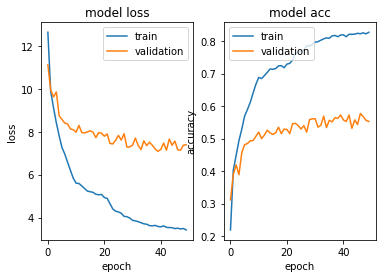

In [7]:
# summarize history for accuracy
t3d.plot()

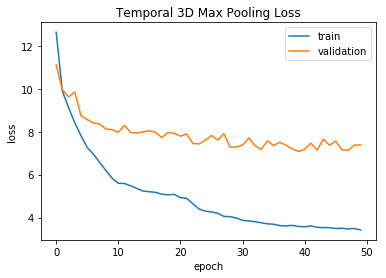

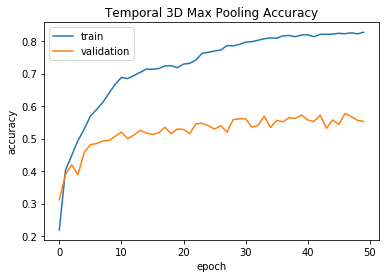

In [8]:
filename1 = 't3d_loss_' + str(num_frames) + 'frames.png'
plt.figure(1)
title1 = 'Temporal 3D Max Pooling Loss'
loss_plot(t3d.hist, title1, filename1)
filename2 = 't3d_accuracy_' + str(num_frames) + 'frames.png'
title2 = 'Temporal 3D Max Pooling Accuracy'
plt.figure(2)
acc_plot(t3d.hist, title2, filename2)

In [9]:
# clear memory first
del Xtr
del ytr
gc.collect()

# load test data
Xte = np.load(npy_path + 'Xtest_all_' + str(num_frames) + 'frames.npy')
yte = np.load(npy_path + 'ytest_all_' + str(num_frames) + 'frames.npy')
print('Xtest shape: ', Xte.shape)
print('ytest shape: ', yte.shape)

# reshape Xtrain to train
Xte = Xte.reshape((-1, num_frames, Xte.shape[1], Xte.shape[2], Xte.shape[3]))
print('Reshape Xtest: ', Xte.shape)

Xtest shape:  (27450, 7, 7, 512)
ytest shape:  (1830,)
Reshape Xtest:  (1830, 15, 7, 7, 512)


In [ ]:
# small test data sets
# Xte = np.load(os.getcwd() + '/datasets/pretrained_fuse_Xtest.npy')

In [10]:
# prediction 
t3d.predict(Xte, yte)

Video Classification Accuracy: 0.5693989071038251


In [11]:
# output classification report, precision-recall matrix
classification_report_func(t3d.add_model, Xte, yte)

                      precision    recall  f1-score   support

               music       0.33      0.37      0.35       195
              gaming       0.52      0.62      0.57       122
      sports/actions       0.69      0.71      0.70       288
news/events/politics       0.45      0.49      0.47       133
        movie/comedy       0.51      0.58      0.54       220
      vehicles/autos       0.73      0.77      0.75       229
               howto       0.51      0.45      0.48       163
        animals/pets       0.62      0.50      0.55       145
         kids/family       0.51      0.38      0.44       152
          food/drink       0.72      0.64      0.68       183

         avg / total       0.57      0.57      0.57      1830



In [12]:
# save model
from models import models
m = models(model = t3d.add_model, model_name = 'temporal_maxpool_model')
m.save()

Unknown
Saved model to disk


In [17]:
# clear memory until gc.collect() output is 0
del Xte
del yte
t3d.add_model = None
t3d = None
# until gc.collect() == 0
gc.collect()

0

## CNN + LSTM model  
In [[1]](https://arxiv.org/abs/1503.08909), Yue-Hei Ng *et al* also describes LSTM model to fuse video frames. As stated in the article, LSTM could maintain dynamic contents of videos to make more accurate predictions. The authors create five stacked LSTM architecture and output softmax score for every frame. In order to give the final single prediction, they come up with four approaches:  
* returning the prediction at the last time step T 
* max-pooling the predictions over time 
* summing the predictions over time and return the max 
* linearly weighting the predictions over time by g then sum and return the max.  

As a result, The accuracy for all four approaches was less than 1% different, but the weighted one give the best results. In our project, we apply the max score method. Our architecture refers to it,   

* Pretrained VGG16 Output --> Stacked LSTM with 512 cells each --> Fully-Connected 10 units --> Softmax

This model should achieve around **60%** test accuracy and F-1 score. The model file is **LSTM_model.py**

Reference:  
[1] Yue-Hei Ng, J., Hausknecht, M., Vijayanarasimhan, S., Vinyals, O., Monga, R., & Toderici, G. (2015). Beyond short snippets: Deep networks for video classification. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 4694-4702).  

In [69]:
# set up
from load_feature import load_features
from datetime import datetime
from model.LSTM_model import video_classification
import numpy as np
import os
import gc
from keras import optimizers
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
# load train data
npy_path = os.getcwd() + '/datasets/'
num_frames = 15
Xtr = np.load(npy_path + 'Xtrain_all_' + str(num_frames) + 'frames.npy')
ytr = np.load(npy_path + 'ytrain_all_' + str(num_frames) + 'frames.npy')

**Note**: LSTM model is easy to overfit when training. One of the reasons is that the datasets should match with the cell number of LSTM layers. Usually, if the volume of datasets are too small, LSTM with big cell numbers should overfit. The training accuracy will reach 100%. But if we set cell numbers small, although the model may not overfit, we could not achieve high enough validation accuracy compared to big cell numbers. Thus, in this case, we build up LSTM model with big cell numbers (Here 128 each). In order to reduce overfitting (not prevent), we add network dropout , recurrent dropout and adjust regularizations. In common case, we should make sure regularization parameter should not be too big so that it will dominate softmax loss. But here, we balance these two losses to penalize the weights. Although overfitting is not easy to avoid in this case, but bigger cell numbers LSTM also achieve higher validation and test accuracy. Here we train smaller epoches to achieve high enough accuracy and stop.  

In [75]:
# build up model 
num_classes = len(np.unique(ytr))
lstm = video_classification(num_frames=num_frames, num_classes=num_classes)

# cell_num depends on volume of datasets
lstm.build_model(cell_num = 128, dropout_rate=0.5, reg=0.1)
print('LSTM model summary: ')
print(lstm.model.summary())

building model...
LSTM model summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 15, 128)           12911104  
_________________________________________________________________
lstm_32 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 13,043,978
Trainable params: 13,043,978
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
'''
Every time you adjust regularization or learning rate, you should release memory first
by running the following codes until output is 0 and then build up new class by 
running codes in the cell above. 
'''
import gc
lstm.model = None
gc.collect() 

0

In [76]:
# let's train our model
# sgd_m = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adam(lr=1e-4, beta_1=0.5, beta_2=0.9, epsilon=1e-8, decay=1e-6)
lstm.train(Xtr=Xtr, ytr=ytr, optimizer = adam, verbose=1, bsize=64, epochs=15)

Model is Training...
Train on 3416 samples, validate on 854 samples
Epoch 1/15
3416/3416 [==============================] - 25s - loss: 3.9717 - acc: 0.2430 - val_loss: 3.7000 - val_acc: 0.3829
Epoch 2/15
3416/3416 [==============================] - 21s - loss: 3.5344 - acc: 0.4476 - val_loss: 3.3484 - val_acc: 0.4789
Epoch 3/15
3416/3416 [==============================] - 21s - loss: 3.1924 - acc: 0.5328 - val_loss: 3.0963 - val_acc: 0.5152
Epoch 4/15
3416/3416 [==============================] - 21s - loss: 2.8883 - acc: 0.6074 - val_loss: 2.8963 - val_acc: 0.5187
Epoch 5/15
3416/3416 [==============================] - 21s - loss: 2.6049 - acc: 0.6748 - val_loss: 2.7021 - val_acc: 0.5597
Epoch 6/15
3416/3416 [==============================] - 21s - loss: 2.3500 - acc: 0.7339 - val_loss: 2.5442 - val_acc: 0.5902
Epoch 7/15
3416/3416 [==============================] - 21s - loss: 2.1220 - acc: 0.7886 - val_loss: 2.4516 - val_acc: 0.5761
Epoch 8/15
3416/3416 [============================

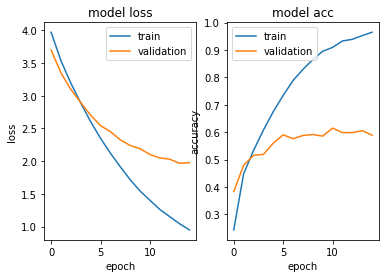

In [77]:
lstm.plot()

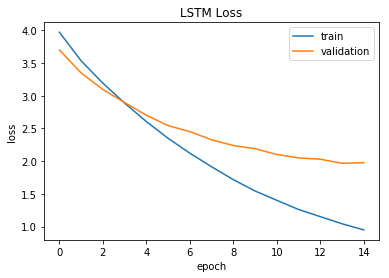

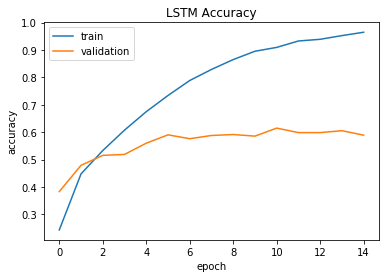

In [78]:
filename1 = 'lstm_loss_' + str(num_frames) + 'frames.png'
plt.figure(1)
title1 = 'LSTM Loss'
loss_plot(lstm.hist, title1, filename1)
filename2 = 'lstm_accuracy_' + str(num_frames) + 'frames.png'
title2 = 'LSTM Accuracy'
plt.figure(2)
acc_plot(lstm.hist, title2, filename2)

In [79]:
# clear memory
del Xtr
del ytr
gc.collect() 

# load test data
Xte = np.load(npy_path + 'Xtest_all_' + str(num_frames) + 'frames.npy')
yte = np.load(npy_path + 'ytest_all_' + str(num_frames) + 'frames.npy')

# reshape Xtrain to train
Xte = Xte.reshape((-1, num_frames, Xte.shape[1]*Xte.shape[2]*Xte.shape[3]))

In [80]:
lstm.predict(Xte, yte)

Video Classification Accuracy: 0.6060109289617487


In [81]:
classification_report_func(lstm.model, Xte, yte)

                      precision    recall  f1-score   support

               music       0.41      0.53      0.46       195
              gaming       0.59      0.67      0.63       122
      sports/actions       0.74      0.72      0.73       288
news/events/politics       0.59      0.47      0.53       133
        movie/comedy       0.49      0.59      0.54       220
      vehicles/autos       0.73      0.82      0.77       229
               howto       0.69      0.44      0.53       163
        animals/pets       0.62      0.50      0.55       145
         kids/family       0.54      0.45      0.49       152
          food/drink       0.69      0.68      0.68       183

         avg / total       0.62      0.61      0.61      1830



### Direct 3D Convolutional 